In [1]:
%matplotlib inline

import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import re
#YCI database.
feature_names = '''1 id: patient identification number
      2 ccf: social security number (I replaced this with a dummy value of 0)
      3 age: age in years
      4 sex: sex (1 = male; 0 = female)
      5 painloc: chest pain location (1 = substernal; 0 = otherwise)
      6 painexer (1 = provoked by exertion; 0 = otherwise)
      7 relrest (1 = relieved after rest; 0 = otherwise)
      8 pncaden (sum of 5, 6, and 7)
      9 cp: chest pain type
     10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
     11 htn
     12 chol: serum cholestoral in mg/dl
     13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
     14 cigs (cigarettes per day)
     15 years (number of years as a smoker)
     16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     17 dm (1 = history of diabetes; 0 = no such history)
     18 famhist: family history of coronary artery disease (1 = yes; 0 = no)
     19 restecg: resting electrocardiographic results
     20 ekgmo (month of exercise ECG reading)
     21 ekgday (day of exercise ECG reading)
     22 ekgyr (year of exercise ECG reading)
     23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
     24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
     25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
     26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
     27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
     28 proto: exercise protocol
     29 thaldur: duration of exercise test in minutes
     30 thaltime: time when ST measure depression was noted
     31 met: mets achieved
     32 thalach: maximum heart rate achieved
     33 thalrest: resting heart rate
     34 tpeakbps: peak exercise blood pressure (first of 2 parts)
     35 tpeakbpd: peak exercise blood pressure (second of 2 parts)
     36 dummy
     37 trestbpd: resting blood pressure
     38 exang: exercise induced angina (1 = yes; 0 = no)
     39 xhypo: (1 = yes; 0 = no)
     40 oldpeak = ST depression induced by exercise relative to rest
     41 slope: the slope of the peak exercise ST segment
     42 rldv5: height at rest
     43 rldv5e: height at peak exercise
     44 ca: number of major vessels (0-3) colored by flourosopy
     45 restckm: irrelevant
     46 exerckm: irrelevant
     47 restef: rest raidonuclid (sp?) ejection fraction
     48 restwm: rest wall (sp?) motion abnormality
     49 exeref: exercise radinalid (sp?) ejection fraction
     50 exerwm: exercise wall (sp?) motion 
     51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
     52 thalsev: not used
     53 thalpul: not used
     54 earlobe: not used
     55 cmo: month of cardiac cath (sp?)  (perhaps "call")
     56 cday: day of cardiac cath (sp?)
     57 cyr: year of cardiac cath (sp?)
     58 num: diagnosis of heart disease 
     59 lmt
     60 ladprox
     61 laddist
     62 diag
     63 cxmain
     64 ramus
     65 om1
     66 om2
     67 rcaprox
     68 rcadist
     69 lvx1: not used
     70 lvx2: not used
     71 lvx3: not used
     72 lvx4: not used
     73 lvf: not used
     74 cathef: not used
     75 junk: not used '''
name_cols = []
for line in feature_names.split('\n'):
    name_cols.append(line.strip().split()[1].strip(': '))
file1=io.TextIOWrapper(urllib.request.urlopen(
    'http://mlr.cs.umass.edu/ml/machine-learning-databases/heart-disease/cleveland.data'),encoding='ISO-8859-1')
file2=io.TextIOWrapper(urllib.request.urlopen(
    'http://mlr.cs.umass.edu/ml/machine-learning-databases/heart-disease/hungarian.data'),encoding='ISO-8859-1')
file3=io.TextIOWrapper(urllib.request.urlopen(
     'http://mlr.cs.umass.edu/ml/machine-learning-databases/heart-disease/long-beach-va.data'),encoding='ISO-8859-1')
outer_list = []
inner_list = []
for file_ in (file1,file2,file3):
    for line in file_:
        quantities = re.split('[^0-9.name-]+',line.strip())
        for x in quantities:
            if x!='name':
                inner_list.append(x)
            else:
                outer_list.append(inner_list)
                inner_list=[]

In [2]:
#Remove attributes more than 76 since we should only have 75 accroding to UCI
removeable_rows = sorted([i for i,row in enumerate(outer_list) if len(row)!=75],reverse=True)
for i in removeable_rows:
    del outer_list[i]
df = pd.DataFrame(outer_list,columns=name_cols)
df.head()

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,...,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk
0,1,0,63,1,-9,-9,-9,-9,1,145,...,-9,1,1,1,1,1,1,1,-9,-9
1,2,0,67,1,-9,-9,-9,-9,4,160,...,-9,1,1,1,1,1,1,1,-9,-9
2,3,0,67,1,-9,-9,-9,-9,4,120,...,-9,2,2,1,1,1,7,3,-9,-9
3,4,0,37,1,-9,-9,-9,-9,3,130,...,-9,1,1,1,1,1,1,1,-9,-9
4,6,0,41,0,-9,-9,-9,-9,2,130,...,-9,1,1,1,1,1,1,1,-9,-9


In [3]:
#Replace ? with Nan
for column in df.columns:
    try:
        df[column]=df[column].astype(int)
    except:
        df[column]=df[column].astype(float)
df = df.applymap(lambda x: np.NaN if x==-9 else x)
df.head()

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,...,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk
0,1,0,63,1,NaN,NaN,NaN,NaN,1,145.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,2,0,67,1,NaN,NaN,NaN,NaN,4,160.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,3,0,67,1,NaN,NaN,NaN,NaN,4,120.0,...,NaN,2.0,2.0,1.0,1.0,1.0,7.0,3.0,NaN,NaN
3,4,0,37,1,NaN,NaN,NaN,NaN,3,130.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,6,0,41,0,NaN,NaN,NaN,NaN,2,130.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [4]:
#Day of the exercise reading, or the ID of the patient are unlikely to be relevant in predicting heart disease. 
#The exercise protocol vary with the hospital, and more indicative of that specific hospital
#The description of the columns on the UCI website also indicates that several of the columns should not be used.

df = df[df.columns[:58]]
for feat in ['id','ccf','ekgday','ekgmo','ekgyr','proto','dummy','restckm','exerckm',
             'thalsev','thalpul','earlobe','cmo','cday','cyr']:
    del df[feat]

In [5]:
for column in df.columns[:10]:
    print(column,' ',len(np.unique(df[column].dropna())))

age   49
sex   2
painloc   2
painexer   2
relrest   2
pncaden   0
cp   4
trestbps   57
htn   2
chol   213


In [6]:
#columns with less than 2 values need to be deleted
for column in df.columns:
    if len(np.unique(df[column].dropna()))<2:
        del df[column]
print(df.shape)

(774, 42)


In [7]:
#drop columns with mostly Nan values
for feat in df.columns:
    #if the column is mostly empty na values, drop it
    if df[feat].dropna().size<df[feat].size/2:
        del df[feat]
df.head()

,age,sex,painloc,painexer,relrest,cp,trestbps,htn,chol,cigs,...,tpeakbps,tpeakbpd,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,num
0,63,1,NaN,NaN,NaN,1,145.0,1.0,233.0,50.0,...,190.0,90.0,85.0,0.0,0.0,2.3,3.0,NaN,172.0,0
1,67,1,NaN,NaN,NaN,4,160.0,1.0,286.0,40.0,...,160.0,90.0,90.0,1.0,0.0,1.5,2.0,NaN,185.0,2
2,67,1,NaN,NaN,NaN,4,120.0,1.0,229.0,20.0,...,140.0,80.0,80.0,1.0,0.0,2.6,2.0,NaN,150.0,1
3,37,1,NaN,NaN,NaN,3,130.0,0.0,250.0,0.0,...,195.0,68.0,78.0,0.0,0.0,3.5,3.0,NaN,167.0,0
4,41,0,NaN,NaN,NaN,2,130.0,1.0,204.0,0.0,...,160.0,74.0,86.0,0.0,0.0,1.4,1.0,NaN,40.0,0


In [8]:
#the column 'cp' consists of four possible values which will need to be one hot encoded.
for column in df.columns:
    if len(np.unique(df[column].dropna().values))<10:
        print('{}: {}'.format(column,np.unique(df[column].dropna().values)))

sex: [0 1]
painloc: [ 0.  1.]
painexer: [ 0.  1.]
relrest: [ 0.  1.]
cp: [1 2 3 4]
htn: [ 0.  1.]
fbs: [ 0.  1.]
famhist: [ 0.  1.]
restecg: [ 0.  1.  2.]
dig: [ 0.  1.]
prop: [  0.   1.  22.]
nitr: [ 0.  1.]
pro: [ 0.  1.]
diuretic: [ 0.  1.]
exang: [ 0.  1.]
xhypo: [ 0.  1.]
slope: [ 0.  1.  2.  3.]
num: [0 1 2 3 4]


In [9]:
#column prop has corupted rows so it will be dropped and cp and restcg are one hot encoded
df = df[(df['prop']!=22.0)]
df = pd.get_dummies(df, columns=['cp','restecg'])
df.head()

,age,sex,painloc,painexer,relrest,trestbps,htn,chol,cigs,years,...,rldv5,rldv5e,num,cp_1,cp_2,cp_3,cp_4,restecg_0.0,restecg_1.0,restecg_2.0
0,63,1,NaN,NaN,NaN,145.0,1.0,233.0,50.0,20.0,...,NaN,172.0,0,1,0,0,0,0,0,1
1,67,1,NaN,NaN,NaN,160.0,1.0,286.0,40.0,40.0,...,NaN,185.0,2,0,0,0,1,0,0,1
2,67,1,NaN,NaN,NaN,120.0,1.0,229.0,20.0,35.0,...,NaN,150.0,1,0,0,0,1,0,0,1
3,37,1,NaN,NaN,NaN,130.0,0.0,250.0,0.0,0.0,...,NaN,167.0,0,0,0,1,0,1,0,0
4,41,0,NaN,NaN,NaN,130.0,1.0,204.0,0.0,0.0,...,NaN,40.0,0,0,1,0,0,0,0,1


In [10]:
from sklearn.model_selection import train_test_split
X = df[df.columns.difference(['num'])]
y = df['num']
X_train,X_test,y_train,y_test = train_test_split(X,y)

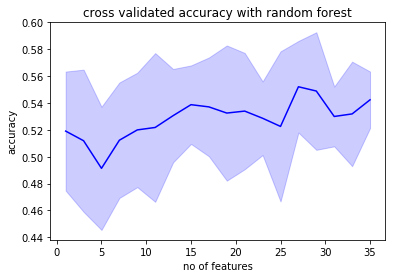

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import Imputer
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
results = list()
std = list()
for i in range(1,37,2):
    pipe = Pipeline([('Imputer',Imputer(missing_values='NaN',strategy='mean',axis=0)),
               ('select_feat',SelectKBest(k=i)),
                ('clf',RandomForestClassifier())])
    cv_scores = cross_val_score(pipe,X_train,y_train,cv=10,n_jobs=-1)
    results.append(cv_scores.mean())
    std.append(cv_scores.std())
    
results, std = np.array(results),np.array(std)
plt.plot(range(1,37,2),results,c='b')
plt.fill_between(range(1,37,2),results-std,results+std,alpha = .2,color='b')
plt.legend(loc='upper left')
plt.xlabel('no of features')
plt.ylabel('accuracy')
plt.title('cross validated accuracy with random forest')
plt.show()

In [33]:
from urllib.request import urlopen
import urllib
Cleveland_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
Hungarian_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
Switzerland_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
np.set_printoptions(threshold=np.nan) #see a whole array when we output it

names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
ClevelandHeartDisease = pd.read_csv(urlopen(Cleveland_data_URL), names = names) #gets Cleveland data
HungarianHeartDisease = pd.read_csv(urlopen(Hungarian_data_URL), names = names) #gets Hungary data
SwitzerlandHeartDisease = pd.read_csv(urlopen(Switzerland_data_URL), names = names) #gets Switzerland data
datatemp = [ClevelandHeartDisease, HungarianHeartDisease, SwitzerlandHeartDisease] #combines all arrays into a list

heartDisease = pd.concat(datatemp)#combines list into one array
heartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,28,1,2,130,132,0,2,185,0,0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0,?,?,?,0


In [34]:
del heartDisease['ca']
del heartDisease['slope']
del heartDisease['thal']

heartDisease = heartDisease.replace('?', np.nan)
heartDisease.dtypes

age              int64
sex              int64
cp               int64
trestbps        object
chol            object
fbs             object
restecg         object
thalach         object
exang           object
oldpeak         object
heartdisease     int64
dtype: object

In [35]:
heartDisease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
0,28,1,2,130,132,0,2,185,0,0,0
1,29,1,2,120,243,0,0,160,0,0,0
2,29,1,2,140,NaN,0,0,170,0,0,0
3,30,0,1,170,237,0,1,170,0,0,0
4,31,0,2,100,219,0,1,150,0,0,0


In [36]:
count = 0
for item in heartDisease:
    for i in heartDisease[item]:
        count += (i == '?')

In [37]:
heartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
0,28,1,2,130,132,0,2,185,0,0,0
1,29,1,2,120,243,0,0,160,0,0,0
2,29,1,2,140,NaN,0,0,170,0,0,0
3,30,0,1,170,237,0,1,170,0,0,0
4,31,0,2,100,219,0,1,150,0,0,0


In [38]:
heartDisease['heartdisease'].count()

711

In [39]:
heartDisease['heartdisease'].value_counts()

0    384
1    260
2     32
3     30
4      5
Name: heartdisease, dtype: int64

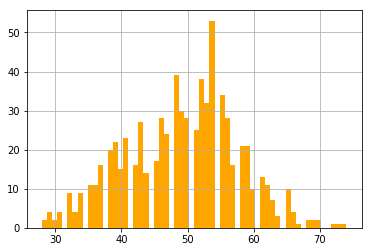

In [41]:
%matplotlib inline
#feature scaling check
heartDisease['age'].hist(bins=60, color='orange')

In [31]:
for item in heartDisease: #converts everything to floats
    heartDisease[item] = pd.to_numeric(heartDisease[item])

def normalize(heartDisease, toNormalize): #normalizes 
    result = heartDisease.copy()
    for item in heartDisease.columns:
        if (item in toNormalize):
            max_value = heartDisease[item].max()
            min_value = heartDisease[item].min()
            result[item] = (heartDisease[item] - min_value) / (max_value - min_value)
    return result
toNormalize = ['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak'] #columns to normalize
heartDisease = normalize(heartDisease, toNormalize)
heartDisease = heartDisease.dropna()
heartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
0,0.000000,1,0.333333,0.416667,0.218905,0.0,2.0,0.961538,0.0,0.342105,0
1,0.021739,1,0.333333,0.333333,0.402985,0.0,0.0,0.769231,0.0,0.342105,0
3,0.043478,0,0.000000,0.750000,0.393035,0.0,1.0,0.846154,0.0,0.342105,0
4,0.065217,0,0.333333,0.166667,0.363184,0.0,1.0,0.692308,0.0,0.342105,0
5,0.086957,0,0.333333,0.208333,0.328358,0.0,0.0,0.807692,0.0,0.342105,0


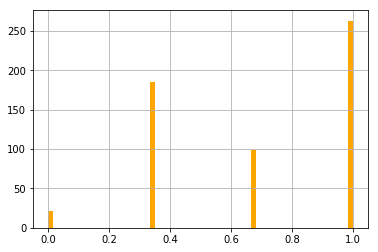

In [32]:
%matplotlib inline
#feature scaling check
heartDisease['cp'].hist(bins=60, color='orange')

In [45]:
for item in heartDisease: #converts everything to floats
    heartDisease[item] = pd.to_numeric(heartDisease[item])

def normalize(heartDisease, toNormalize): #normalizes 
    result = heartDisease.copy()
    for item in heartDisease.columns:
        if (item in toNormalize):
            max_value = heartDisease[item].max()
            min_value = heartDisease[item].min()
            result[item] = (heartDisease[item] - min_value) / (max_value - min_value)
    return result
toNormalize = ['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak'] #columns to normalize
heartDisease = normalize(heartDisease, toNormalize)
heartDisease = heartDisease.dropna()
heartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
0,0.000000,1,0.333333,0.416667,0.218905,0.0,2.0,0.961538,0.0,0.342105,0
1,0.021739,1,0.333333,0.333333,0.402985,0.0,0.0,0.769231,0.0,0.342105,0
3,0.043478,0,0.000000,0.750000,0.393035,0.0,1.0,0.846154,0.0,0.342105,0
4,0.065217,0,0.333333,0.166667,0.363184,0.0,1.0,0.692308,0.0,0.342105,0
5,0.086957,0,0.333333,0.208333,0.328358,0.0,0.0,0.807692,0.0,0.342105,0


In [46]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(heartDisease, test_size = 0.3)

X_train = train.drop('heartdisease',axis=1)

y_train = train['heartdisease']

X_test =  test.drop('heartdisease',axis=1)

y_test = test['heartdisease']

In [47]:
from sklearn.linear_model import LogisticRegression
clf0 = LogisticRegression(random_state=10)
clf0.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
y_pred = clf0.predict(X_test)
accuracy_regr=accuracy_score(y_test, y_pred)
precision_regr=precision_score(y_test, y_pred,average='weighted')
recall_regr=recall_score(y_test, y_pred,average='weighted')
f1_regr=f1_score(y_test,y_pred,average='weighted')
print("accuracy:", accuracy_regr)
print("Precision:", precision_regr)
print("Recall:", recall_regr)
print('f1_score:',f1_regr)

accuracy: 0.789473684211
Precision: 0.735544189628
Recall: 0.789473684211
f1_score: 0.760906360906


/Users/nish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(random_state=10)
clf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [50]:
y_pred1 = clf1.predict(X_test)
accuracy_rf=accuracy_score(y_test, y_pred1)
precision_rf=precision_score(y_test, y_pred1,average='weighted')
recall_rf=recall_score(y_test, y_pred1,average='weighted')
f1_rf=f1_score(y_test,y_pred1,average='weighted')
print("accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print('f1_score:',f1_rf)

accuracy: 0.87134502924
Precision: 0.837499823573
Recall: 0.87134502924
f1_score: 0.851535503488


/Users/nish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:
from sklearn.ensemble import GradientBoostingClassifier
clf2=GradientBoostingClassifier(random_state=10)
clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)
accuracy_gb=accuracy_score(y_test, y_pred2)
precision_gb=precision_score(y_test, y_pred2,average='weighted')
recall_gb=recall_score(y_test, y_pred2,average='weighted')
f1_gb=f1_score(y_test,y_pred2,average='weighted')
print("accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print('f1_score:',f1_gb)

accuracy: 0.877192982456
Precision: 0.880600648317
Recall: 0.877192982456
f1_score: 0.877703198872


In [52]:
arraycuracy=[]
arraycuracy.append(accuracy_regr)
arraycuracy.append(accuracy_rf)
arraycuracy.append(accuracy_gb)

In [53]:
precisionray=[]
precisionray.append(precision_regr)
precisionray.append(precision_rf)
precisionray.append(precision_gb)

In [54]:
recallray=[]
recallray.append(recall_regr)
recallray.append(recall_rf)
recallray.append(recall_gb)

In [57]:
f1ray=[]
f1ray.append(f1_regr)
f1ray.append(f1_rf)
f1ray.append(f1_gb)

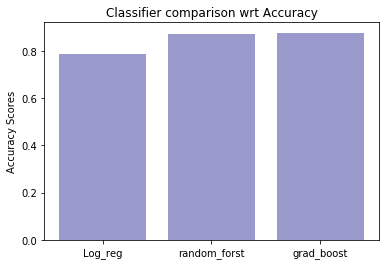

In [58]:
import matplotlib.pyplot as plt
classifier_names=('Log_reg','random_forst','grad_boost')
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis, arraycuracy, alpha=0.4,color='navy',ecolor='navy')
plt.xticks(y_axis, classifier_names)
plt.ylabel('Accuracy Scores')
plt.title('Classifier comparison wrt Accuracy')
plt.show()

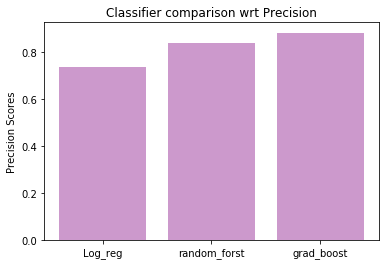

In [59]:
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis,precisionray, alpha=0.4,color='purple',ecolor='darkgreen')
plt.xticks(y_axis, classifier_names)
plt.ylabel('Precision Scores')
plt.title('Classifier comparison wrt Precision')
plt.show()

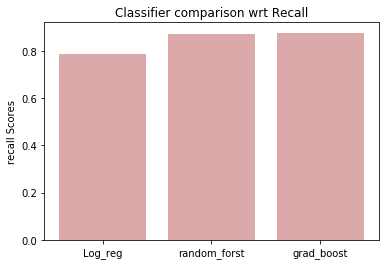

In [60]:
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis,recallray, alpha=0.4,color='brown',ecolor='black')
plt.xticks(y_axis, classifier_names)
plt.ylabel('recall Scores')
plt.title('Classifier comparison wrt Recall')
plt.show()